In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib as mpl
import imageio
import numpy as np
from a2_tools import *

This notebook outlines the various bits of code that were used to create one particular work, but can hopefully give you some ideas on how you might get started creating your own. 

This particular work that I gave the uninspiring title "A2 Egy" (A2 as in A2 lattice and Egy as in Hungarian for one), consists of essentially two elements along with a collection of sinusoids and a color varying function. 

The first element is the background, which consists of two tiling variations on an A2 (aka hexagonal) lattice. An A2 lattice is simply defined by a series of points connected by two vectors, A and B:

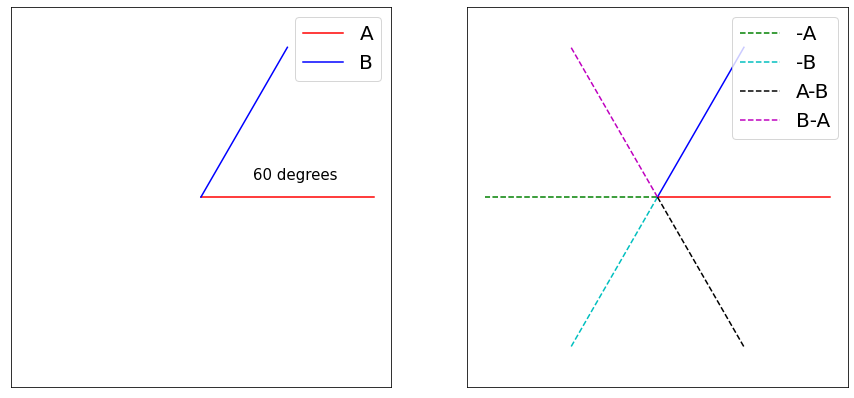

In [2]:
A = np.array([1.,0.])
B = np.array([np.cos(np.pi/3.),np.sin(np.pi/3.)])

F = plt.figure(figsize=(15,8))
ax = F.add_subplot(121)
ax.plot([0,A[0]],[0,A[1]],'r-',label='A')
ax.plot([0,B[0]],[0,B[1]],'b-',label='B')
ax.annotate('60 degrees',xy=(0.3,0.1),fontsize=15)
ax.legend(fontsize=20)
ax.set_aspect('equal')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_xticks([])
ax.set_yticks([])

ax = F.add_subplot(122)
ax.plot([0,A[0]],[0,A[1]],'r-')
ax.plot([0,B[0]],[0,B[1]],'b-')
ax.plot([0,-1],[0,0],'g--',label='-A')
ax.plot([0,(-1.)*B[0]],[0,(-1.)*B[1]],'c--',label='-B')
ax.plot([0,A[0]-B[0]],[0,A[1]-B[1]],'k--',label='A-B')
ax.plot([0,B[0]-A[0]],[0,B[1]-A[1]],'m--',label='B-A')
ax.legend(fontsize=20)
ax.set_aspect('equal')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

The A2 lattice is then created by repeating this process at the ends of each of these 6 vectors. You can see that the nodes of the A2 lattice define the vertices of a triangular tiling. To fill in each of these triangles, I use the matplotlib Patches module. This comes with a number of preset patches, but you can create custom patches with arbitrary shape using the matplotlib.Patches.PathPatch. You simply need to create a "path" object based on the vertices of your desired shape. Here's the equilateral triangle patch object I created:

In [3]:
class EqTri(object):
    
    def __init__(self,cent,L=1.,rang=0.):
        h=L/2.
        t1 = np.tan(np.pi/6.)
        c1 = np.cos(np.pi/6.)
        xs = (np.array([-1.,1.,0,1.])*h)
        ys = (np.array([(-1.)*t1,(-1.)*t1,1./c1,(-1.)*t1])*h)
        vs = np.vstack((xs,ys))
        
        rmat = np.array([
            [np.cos(rang),(-1.)*np.sin(rang)],
            [np.sin(rang),np.cos(rang)]
        ])

        vs = np.dot(vs.T,rmat).T
        vs[0]+=cent[0]
        vs[1]+=cent[1]
        self.verts = []
        for i in range(len(xs)): self.verts.append((vs[0][i],vs[1][i]))
        self.codes = [
            Path.MOVETO,
            Path.LINETO,
            Path.LINETO,
            Path.CLOSEPOLY,
        ]

        self.path = Path(self.verts,self.codes)

You can see I define the vertices as a list of tuples and then there is a list called "self.codes" which tells PathPatch how to connect the vertices. In this case they are all connected with straight lines, however you can also connect them with curves. My EqTri class is simply defined by the centre, the edge length, and the desired rotation angle. Once you create this object, you simply pass its .path to PathPatch to create the patch, then add it to your axis:

(-0.9, 0.8)

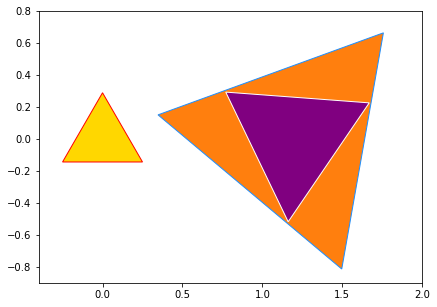

In [4]:
tri1 = EqTri([0,0],L=0.5,rang=0.)
tri1 = patches.PathPatch(tri1.path,fc='gold',ec='red')
tri2 = EqTri([1.2,0],L=1.5,rang=np.pi/4.5)
tri2 = patches.PathPatch(tri2.path,fc='tab:orange',ec='dodgerblue')
tri3 = EqTri([1.2,0],L=.9,rang=np.pi/2.8)
tri3 = patches.PathPatch(tri3.path,fc='purple',ec='w')

F = plt.figure(figsize=(12,5))
ax = F.add_subplot(111)
# SET ASPECT 'equal' ENSURES THAT YOUR CAREFULLY DEFINED OBJECTS DON'T GET SQUISHED!!!
ax.set_aspect('equal')
ax.add_patch(tri1)
ax.add_patch(tri2)
ax.add_patch(tri3)
ax.set_xlim(-.4,2)
ax.set_ylim(-.9,.8)

From these two ideas you can now create a simply triangular tiling pattern. Stupidly, because I created my EqTri class based on the center position, this actually makes achieving this a headache (you need a slightly modified A2 lattice...), but I got there in the end:

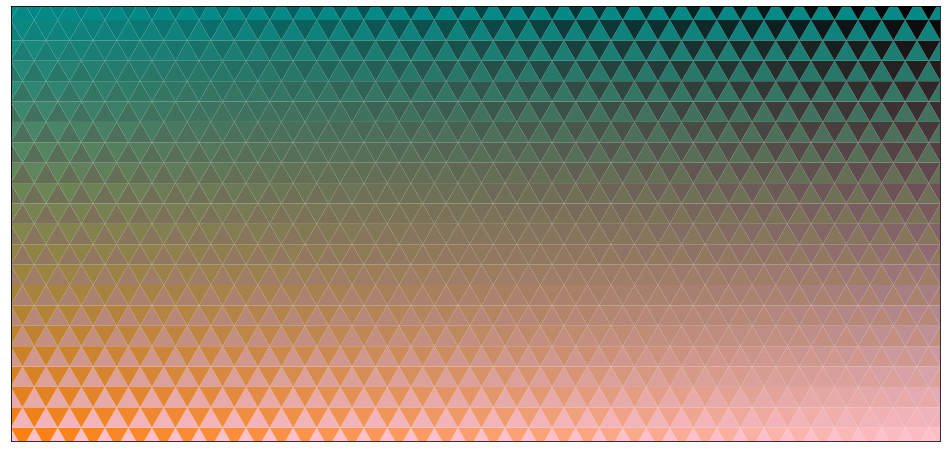

In [5]:
L = 12.
Nr,Nc = 44,40
eqcs = EqTriTi(Nr,Nc,L=L)
c1,c2 = 'r','orange'

F = plt.figure(figsize=(20,8))
ax = F.add_subplot(111)
ax.set_aspect('equal')

for i in range(len(eqcs.x)):
    tc = [eqcs.x[i],eqcs.y[i]]
    c1 = colorFader('pink','k',tc[1]/eqcs.y.max())
    c2 = colorFader('tab:orange','darkcyan',tc[1]/eqcs.y.max())
    if eqcs.angs[i] == 0:
        tcol = colorFader(c1,c2,tc[1]/eqcs.y.max())
        tri = EqTri(tc,rang=eqcs.angs[i],L=L)
        ptc = patches.PathPatch(tri.path,fc=tcol,ec='None')
        ax.add_patch(ptc)
    else:
        tcol = colorFader(c2,c1,tc[0]/eqcs.x.max())
        tri = EqTri(tc,rang=eqcs.angs[i],L=L)
        ptc = patches.PathPatch(tri.path,fc=tcol,ec='None')
        ax.add_patch(ptc)

ax.set_xlim(eqcs.x.min(),eqcs.x.max())
ax.set_ylim(eqcs.y.min(),eqcs.y.max())
# Get rid of those bloody tics, this is art not maths!
ax.set_xticks([])
ax.set_yticks([])
plt.show()

This also demonstrates one of the other important bits of code that I use a lot: colorFader. This is a function that I stole from stackexchange a long time ago for use in my plots:

In [6]:
def colorFader(c1,c2,mix=0): 
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

This simply transitions from color c1 to color c2 where mix is a number between 0 and 1. 0 for c1 and 1 for c2. Colors can be named colors, RGB, hex, whatever. 

Another thing to note, you can create a trihexagonal lattice with only triangular patches (i.e. no hexagon) and the right color scheme:

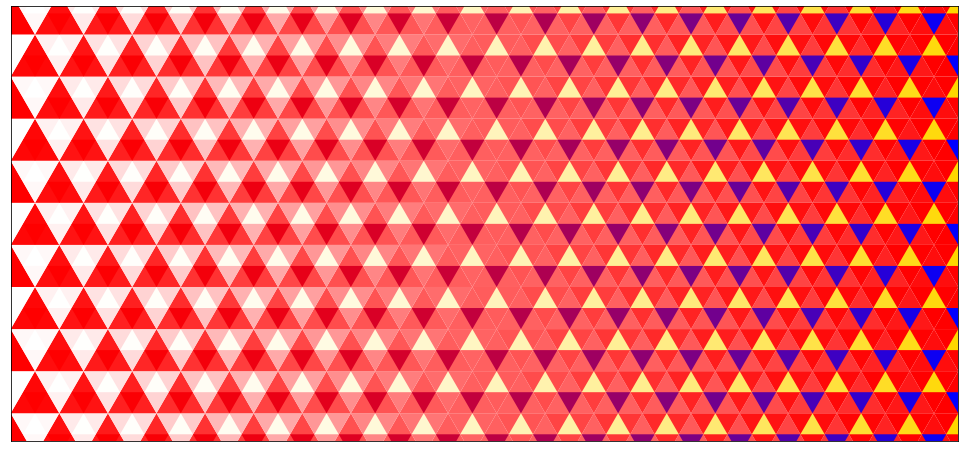

In [7]:
L = 12.
Nr,Nc = 22,20
eqcs = EqTriTi(Nr,Nc,L=L)

F = plt.figure(figsize=(20,8))
ax = F.add_subplot(111)
ax.set_aspect('equal')

for i in range(len(eqcs.x)):
    tc = [eqcs.x[i],eqcs.y[i]]
    c1 = 'r'
    c2 = colorFader('w','r',(tc[0]/eqcs.x.max())**2.)
    c3 = colorFader('r','b',(tc[0]/eqcs.x.max())**2.)
    c4 = colorFader('w','gold',(tc[0]/eqcs.x.max())**2.)
    if eqcs.angs[i] == 0:
        tcol = colorFader(c1,c2,tc[0]/eqcs.x.max())
        tri = EqTri(tc,rang=eqcs.angs[i],L=L)
        tr2 = EqTri(tc,rang=eqcs.angs[i]+np.pi,L=L/2.)
        ptc = patches.PathPatch(tri.path,fc=tcol,ec='None')
        ax.add_patch(ptc)
        ptc = patches.PathPatch(tr2.path,fc=c3,ec='None')
        ax.add_patch(ptc)
    else:
        tcol = colorFader(c2,c1,tc[0]/eqcs.x.max())
        tri = EqTri(tc,rang=eqcs.angs[i],L=L)
        tr2 = EqTri(tc,rang=eqcs.angs[i]+np.pi,L=L/2.)
        ptc = patches.PathPatch(tri.path,fc=tcol,ec='None')
        ax.add_patch(ptc)
        ptc = patches.PathPatch(tr2.path,fc=c4,ec='None')
        ax.add_patch(ptc)

ax.set_xlim(eqcs.x.min(),eqcs.x.max())
ax.set_ylim(eqcs.y.min(),eqcs.y.max())
# Get rid of those bloody tics, this is art not maths!
ax.set_xticks([])
ax.set_yticks([])
plt.show()

This is the basics of the transition in the background of A2 Egy.

The flowers are the result of me exploring the so called "flower of life", which is some hippy-dippy new age nonsense based on "sacred geometry". Its essentially a bunch of circles placed on an A2 lattice meaning it has hexagonal symmetries. I wanted to see if I could create something similar but using different polygons (i.e. pentagons, nonagons, etc). Turns out hexagon is really the most aesthetically pleasing:

0.0 0.0
10 0.0
21 0.0


[]

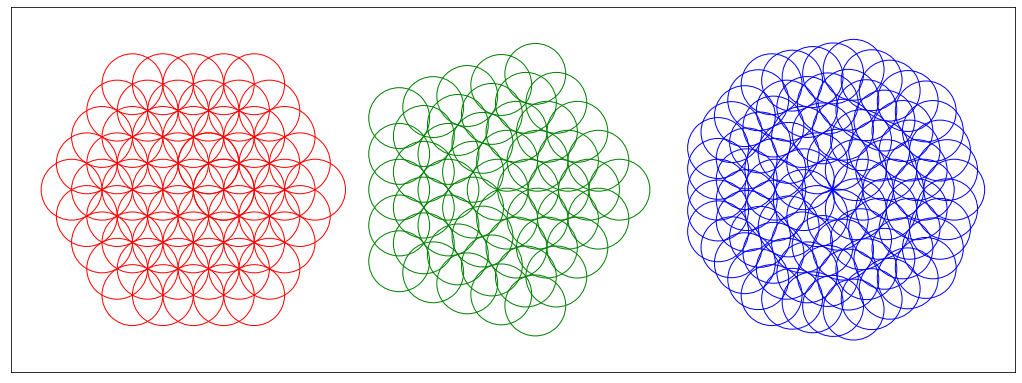

In [8]:
class FlowerShow(PowerFlower):

    def __init__(self,N=6,xs=0.,ys=0.,npoints=1000,rad=1.):
        super().__init__(N=N,xs=xs,ys=ys,npoints=npoints,rad=rad)
        for i in range(4): self.add_layer()

    def display(self,ax,c='k',fl=0):
        
        for k in self.values.keys():
            if k == 'layer0':
                print(self.xs,self.ys)
                ax.add_patch(plt.Circle([self.xs,self.ys],radius=self.rad,color='None',ec=c))
            for i in range(self.values[k]['coords'].shape[0]):
                    
                cx,cy = self.values[k]['cents'][0][i],self.values[k]['cents'][1][i]
                
                if fl == 0 or cx > 3:
                    ax.add_patch(plt.Circle([cx,cy],radius=self.rad,color='None',ec=c))
                
pf6 = FlowerShow()
pf5 = FlowerShow(N=5,xs=10)
pf9 = FlowerShow(N=9,xs=21)

F = plt.figure(figsize=(18,8))
ax = F.add_subplot(111)
ax.set_aspect('equal')
pf6.display(ax,c='r')
pf5.display(ax,fl=1,c='g')
pf9.display(ax,fl=1,c='b')
ax.set_xlim(-6,27)
ax.set_ylim(-6,6)
ax.set_xticks([])
ax.set_yticks([])

For A2 Egy I created two special classes of these that simply adds one layer but only plots points that are within the central circle. Then I created a function which creates a series of these with decreasing size and over plots them. In each iteration, the current object is slightly rotated relative to the previous one (with the min and max rotations defined, there's also a sin function thrown in there...) and colorFader changes the color as well:

In [9]:
class TriFlower(PowerFlower):
    def __init__(self,rad,xs=0,ys=0,bang=np.pi/2.):
        super().__init__(N=3,xs=xs,ys=ys,rad=rad)
        self.add_layer()
        self.rotate(bang)

    def rotate(self,ang):
        rmat = np.array([[np.cos(ang),(-1.)*np.sin(ang)],
                             [np.sin(ang),np.cos(ang)]])
        for layer in self.values.keys():
            if layer == 'layer0': pass
            else:
                tmd = self.values[layer]
                for i in range(tmd['coords'].shape[0]):
                    tcrd = tmd['coords'][i]
                    tv = np.vstack((tcrd[0]-self.xs,tcrd[1]-self.ys))
                    tv = np.dot(tv.T,rmat).T
                    self.values[layer]['coords'][i][0] = tv[0]+self.xs
                    self.values[layer]['coords'][i][1] = tv[1]+self.ys
                    

    def add_to_ax(self,ax,tc='k',p1=True,a=1.):
        lnames = self.values.keys()
        for layer in lnames:
            tmd = self.values[layer]
            if layer == 'layer0':
                if p1:
                    ax.plot(tmd['coords'][0],tmd['coords'][1],'-',c=tc,lw=2)
            else:
                for i in range(tmd['coords'].shape[0]):
                    tcrd = tmd['coords'][i]
                    tx,ty = tcrd[0]-self.xs,tcrd[1]-self.ys
                    tr = np.sqrt((tx*tx)+(ty*ty))
                    tp = np.where(tr <= self.rad*.999)[0]
                    ax.plot(tcrd[0][tp[:-1]],tcrd[1][tp[:-1]],'-',c=tc,lw=1.5,alpha=a)
                    
class HexFlower(PowerFlower):
    def __init__(self,rad,xs=0,ys=0,bang=np.pi/2.):
        super().__init__(N=6,xs=xs,ys=ys,rad=rad)
        self.add_layer()
        self.rotate(bang)

    def rotate(self,ang):
        rmat = np.array([[np.cos(ang),(-1.)*np.sin(ang)],
                             [np.sin(ang),np.cos(ang)]])
        for layer in self.values.keys():
            if layer == 'layer0': pass
            else:
                tmd = self.values[layer]
                for i in range(tmd['coords'].shape[0]):
                    tcrd = tmd['coords'][i]
                    tv = np.vstack((tcrd[0]-self.xs,tcrd[1]-self.ys))
                    tv = np.dot(tv.T,rmat).T
                    self.values[layer]['coords'][i][0] = tv[0]+self.xs
                    self.values[layer]['coords'][i][1] = tv[1]+self.ys
                    

    def add_to_ax(self,ax,tc='k',p1=True,a=1.):
        lnames = self.values.keys()
        for layer in lnames:
            tmd = self.values[layer]
            if layer == 'layer0':
                if p1:
                    ax.plot(tmd['coords'][0],tmd['coords'][1],'-',c=tc,lw=3)
            else:
                for i in range(tmd['coords'].shape[0]):
                    tcrd = tmd['coords'][i]
                    tx,ty = tcrd[0]-self.xs,tcrd[1]-self.ys
                    tr = np.sqrt((tx*tx)+(ty*ty))
                    tp = np.where(tr <= self.rad*.999)[0]
                    ax.plot(tcrd[0][tp[:-1]],tcrd[1][tp[:-1]],'o',ms=1,c=tc,alpha=a)

NameError: name 'PF' is not defined

In [151]:
def tri_to_ax(ax,xs=0,ys=0,N=10,bang=np.pi/2.,rr=1.,mxang=np.pi/13.,c1='k',c2='r',a=1.):
    rads = np.linspace(0.1*rr,rr,N)
    rads = np.flip(rads)
    xx = np.linspace(0.,np.pi,N)
    angs = np.sin(xx)*mxang
    for i,r in enumerate(rads):
        col = colorFader(c1,c2,float(i)/(float(len(rads)-1)))
        d = TriFlower(r,xs=xs,ys=ys,bang=bang)
        d.rotate(angs[i])
        tp1 = False
        if r == 10000: tp1 = True
        d.add_to_ax(ax,tc=col,p1=tp1,a=a)
        
def hex_to_ax(ax,xs=0,ys=0,N=10,bang=0.,rr=1.,mxang=np.pi/13.,c1='k',c2='r',a=1.):
    rads = np.linspace(0.1*rr,rr,N)
    rads = np.flip(rads)
    xx = np.linspace(0.,np.pi,N)
    angs = np.sin(xx)*mxang
    for i,r in enumerate(rads):
        col = colorFader(c1,c2,float(i)/(float(len(rads)-1)))
        d = HexFlower(r,xs=xs,ys=ys,bang=bang)
        d.rotate(angs[i])
        tp1 = False
        if r == 10000: tp1 = True
        d.add_to_ax(ax,tc=col,p1=tp1,a=a)

[]

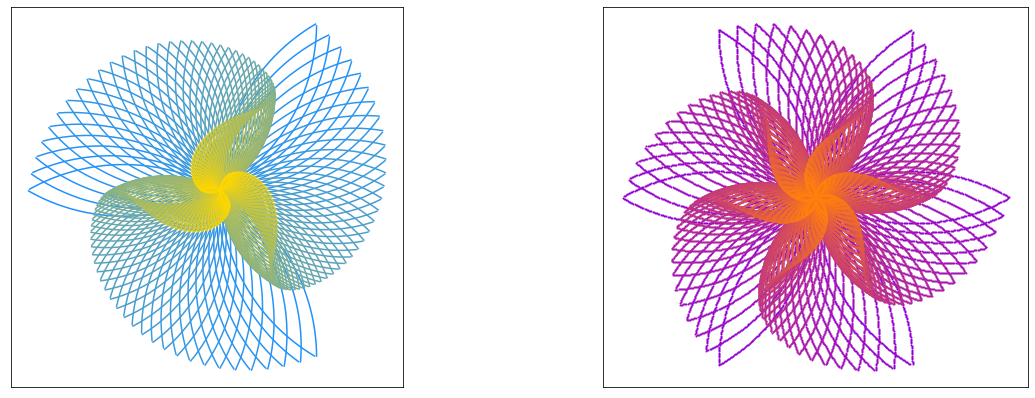

In [156]:
F = plt.figure(figsize=(20,7))
ax = F.add_subplot(121)
ax.set_aspect('equal')
tri_to_ax(ax,N=75,bang=0.,mxang=2.*np.pi/3.,c1='dodgerblue',c2='gold')
ax.set_xticks([])
ax.set_yticks([])

ax = F.add_subplot(122)
ax.set_aspect('equal')
hex_to_ax(ax,N=35,bang=0.,mxang=np.pi/3.,c1='darkviolet',c2='tab:orange')
ax.set_xticks([])
ax.set_yticks([])

This is essentially all there is to it. The rest is just carefully placing the flowers, and adding sine and cosine varying sizes, colours, and alpha values for each of the various elements. In the case of colours, I use this function, which stacks on top of colorFader and predefines a sinusoidally varying switch between two colours across a specified number of values and covering a specified number periods:

In [158]:
def sinuswitchcolor(length,periods,c1,c2):
    clt = np.linspace(0,2.*periods*np.pi,length)
    clt = (((-1.)*np.cos(clt))/2.)+0.5
    
    return [colorFader(c1,c2,_c) for _c in clt]

A couple of final things. First it took me a while to sort out how to make the axes fill the entire plot, this was eventually as simple as defining the axes just so:

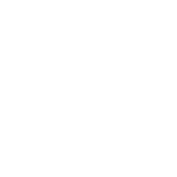

In [161]:
xsize,ysize=1,2
F = plt.figure(frameon=False,figsize=(xsize,ysize),dpi=150)
ax = plt.Axes(F,[0.01,0.01,.98,.98])
ax.set_aspect('equal')
ax.set_axis_off()
F.add_axes(ax)

And finally, I use the package imageio to create the animation. This is done by outputting each frame as 'frame.png', loading it back in with imageio and appending it to a list of such objects. At the end there's a magical function called mimsave in imageio that reads in the list of images and outputs an animation. This looks something like:

In [ ]:
nframes = 10
images = []
for i in range(nframes):
    create_frame_function()
    images.append(imageio.imread('frame.png'))
imageio.mimsave('./output.gif',images)